<a href="https://colab.research.google.com/github/mahakdamani28/mahakdamani28.github.io/blob/main/INTERSHIP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT NAME: PREDICTIVE ANALYSIS FOR STOCK MARKET TREND
BY MAHAK DAMANI

In [ ]:
# Step 1: Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Read dataset
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/refs/heads/main/Google_Stock_Price_Train.csv')

# Convert 'Close' and 'Volume' columns to numeric, coercing errors
df['Close'] = pd.to_numeric(df['Close'].str.replace(',', ''), errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'].str.replace(',', ''), errors='coerce')

# Drop rows with NaN values that resulted from coercion
df.dropna(inplace=True)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500
1,1/4/2012,331.27,333.87,329.08,666.45,5749400
2,1/5/2012,329.83,330.75,326.89,657.21,6590300
3,1/6/2012,328.34,328.77,323.68,648.24,5405900
4,1/9/2012,322.04,322.29,309.46,620.76,11688800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,533.709833,537.880223,529.007409,712.669666,3.158107e+06
std,151.904442,153.008811,150.552807,164.752591,2.273726e+06
min,279.120000,281.210000,277.220000,491.200000,7.900000e+03
25%,404.115000,406.765000,401.765000,576.740000,1.621700e+06
50%,537.470000,540.750000,532.990000,695.675000,2.566150e+06
75%,654.922500,662.587500,644.800000,782.105000,4.122500e+06
max,816.680000,816.680000,805.140000,1216.830000,2.497790e+07


In [ ]:
# Step 3: define y and x
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
y = df['Close']
x = df[['Open', 'High', 'Low', 'Volume']]

In [ ]:
# Step 4: Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=2529)

<Axes: xlabel='Open', ylabel='Close'>

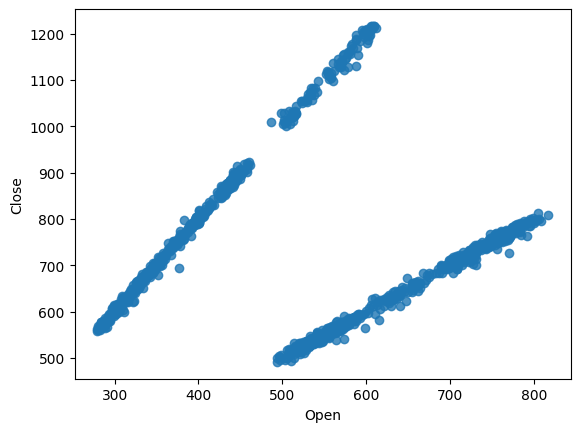

In [ ]:
sns.regplot(x ='Open', y='Close' , data=df, fit_reg=False)

In [ ]:
# Step 5 : Select model
model = LinearRegression()

In [ ]:
# Step 6 : Train model
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.intercept_,model.coef_

(np.float64(257.8211209246233),
 array([-1.92764978e+00, -7.87378789e+00,  1.04929018e+01,  5.19487735e-05]))

In [ ]:
# Step 7: prediction
y_pred = model.predict(x_test)

In [ ]:
# Step 8: evaulate
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mean_absolute_percentage_error(y_test, y_pred)

0.14536861132640053

In [ ]:
import statsmodels.api as sm
x_constant = sm.add_constant(x)
model = sm.OLS(y, x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     78.12
Date:                Thu, 03 Jul 2025   Prob (F-statistic):           3.30e-59
Time:                        15:14:26   Log-Likelihood:                -8065.9
No. Observations:                1258   AIC:                         1.614e+04
Df Residuals:                    1253   BIC:                         1.617e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        360.4017     23.227     15.516      0.000     314.834     405.970
Open           0.1959      1.209      0.162      0.871      -2.176       2.568
High         -10.8854      1.240     -8.781      0.000     -13.317      -8.453
Low           11.3095      1.021     11.082      0.000       9.307      13.312
Volume      3.797e-05   2.38e-06     15.962      0.000    3.33e-05    4.26e-05
==============================================================================
Omnibus:                      178.809   Durbin-Watson:                   0.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.110
Skew:                           0.942   Prob(JB):                     1.01e-63
Kurtosis:                       4.409   Cond. No.                     2.17e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

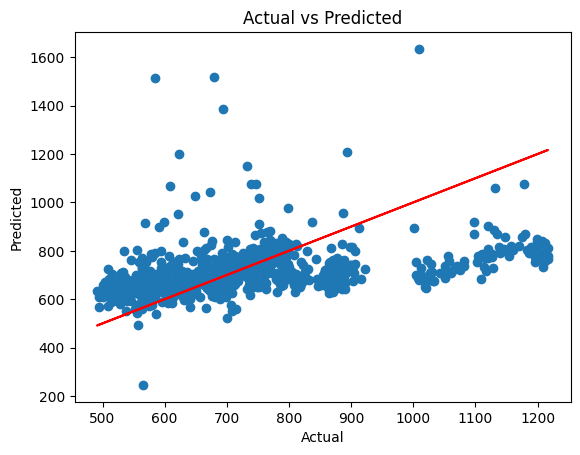

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()